In [5]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import random
import pandas as pd
pd.set_option('float_format', '{:f}'.format)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 165)
from matplotlib.pyplot import figure
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import datetime
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from math import floor
import os
import pickle
from sklearn.preprocessing import MinMaxScaler
import time
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [2]:
cat_list=[ 'location','location2','message','senor_type','lastSensorEventHours','lastSensorDayOfWeek','prevDominantSensor1','prevDominantSensor2','lastSensorID','lastSensorLocation','lastMotionLocation']
num_list=[ 'lastSensorEventSeconds','windowDuration','timeSinceLastSensorEvent','complexity','activityChange','areaTransitions','sensorCount-Bathroom','sensorCount-Bedroom','sensorCount-Chair','sensorCount-DiningRoom','sensorCount-Hall','sensorCount-Ignore','sensorCount-Kitchen','sensorCount-LivingRoom','sensorCount-Office','sensorCount-OutsideDoor','sensorCount-WorkArea','sensorElTime-Bathroom','sensorElTime-Bedroom','sensorElTime-Chair','sensorElTime-DiningRoom','sensorElTime-Hall','sensorElTime-Ignore','sensorElTime-Kitchen','sensorElTime-LivingRoom','sensorElTime-Office','sensorElTime-OutsideDoor','sensorElTime-WorkArea']

In [41]:
i=0
start_time = time.time()
X_train=pd.read_csv(r'model_dataset\csh_X_train_preprocessed.csv')
print("--- %s seconds --- %s mins ---" % ((time.time() - start_time), (time.time() - start_time)/60))
X_train[cat_list]=X_train[cat_list].astype('str')
X_train=X_train.drop(['Unnamed: 0','sensor'],axis=1)
# X_train=pd.concat([pd.get_dummies(X_train[cat_list],drop_first=True),X_train[num_list]],axis=1)
print("--- %s seconds --- %s mins ---" % ((time.time() - start_time), (time.time() - start_time)/60))
y_train=pd.read_csv(r'model_dataset\csh_y_train.csv')
print("--- %s seconds --- %s mins ---" % ((time.time() - start_time), (time.time() - start_time)/60))

--- 88.84305810928345 seconds --- 1.4807176351547242 mins ---
--- 138.32018613815308 seconds --- 2.3053364356358848 mins ---
--- 140.65737795829773 seconds --- 2.3442896326382954 mins ---


In [42]:
X_train=X_train[(y_train['target']!='Read')&(y_train['target']!='Relax')].reset_index(drop=True)
y_train=y_train[(y_train['target']!='Read')&(y_train['target']!='Relax')].reset_index(drop=True)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.5, random_state=42,stratify=y_train)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42,stratify=y_train)
df=pd.concat([X_train,y_train],axis=1)
df['lastSensorEventHours']=df['lastSensorEventHours'].apply(lambda x: x.replace('.0','')).astype('int')

In [46]:
df['target'].value_counts()

Other               516882
Prep_for_meal       464731
Washroom            318493
Entertain_Guests    244254
Getting_ready       188227
Work                181686
Sleep               144947
TV                  131802
Eat                  57388
Leave_Home           27500
Enter_Home           20843
Name: target, dtype: int64

In [84]:
# X_train.to_csv(r'model_dataset\X_train_sample_1.csv',index=None)
# y_train.to_csv(r'model_dataset\y_train_sample_1.csv',index=None)
# X_test.to_csv(r'model_dataset\X_test_sample_1.csv',index=None)
# y_test.to_csv(r'model_dataset\y_test_sample_1.csv',index=None)

In [88]:
Prep_for_meal=df[df['target']=='Prep_for_meal'].sort_values(by='lastSensorDayOfWeek')
Other=df[df['target']=='Other'].sort_values(by='lastSensorDayOfWeek')
Washroom=df[df['target']=='Washroom'].sort_values(by='lastSensorDayOfWeek')
Entertain_Guests=df[df['target']=='Entertain_Guests'].sort_values(by='lastSensorDayOfWeek')
Getting_ready=df[df['target']=='Getting_ready'].sort_values(by='lastSensorDayOfWeek')
Work=df[df['target']=='Work'].sort_values(by='lastSensorDayOfWeek')
Sleep=df[df['target']=='Sleep'].sort_values(by='lastSensorDayOfWeek')
TV=df[df['target']=='TV'].sort_values(by='lastSensorDayOfWeek')
Eat=df[df['target']=='Eat'].sort_values(by='lastSensorDayOfWeek')
Leave_Home=df[df['target']=='Leave_Home'].sort_values(by='lastSensorDayOfWeek')
Enter_Home=df[df['target']=='Enter_Home'].sort_values(by='lastSensorDayOfWeek')

### Time and day of week vs Target Variable

[Text(0.5, 1.0, 'Entertain_Guests')]

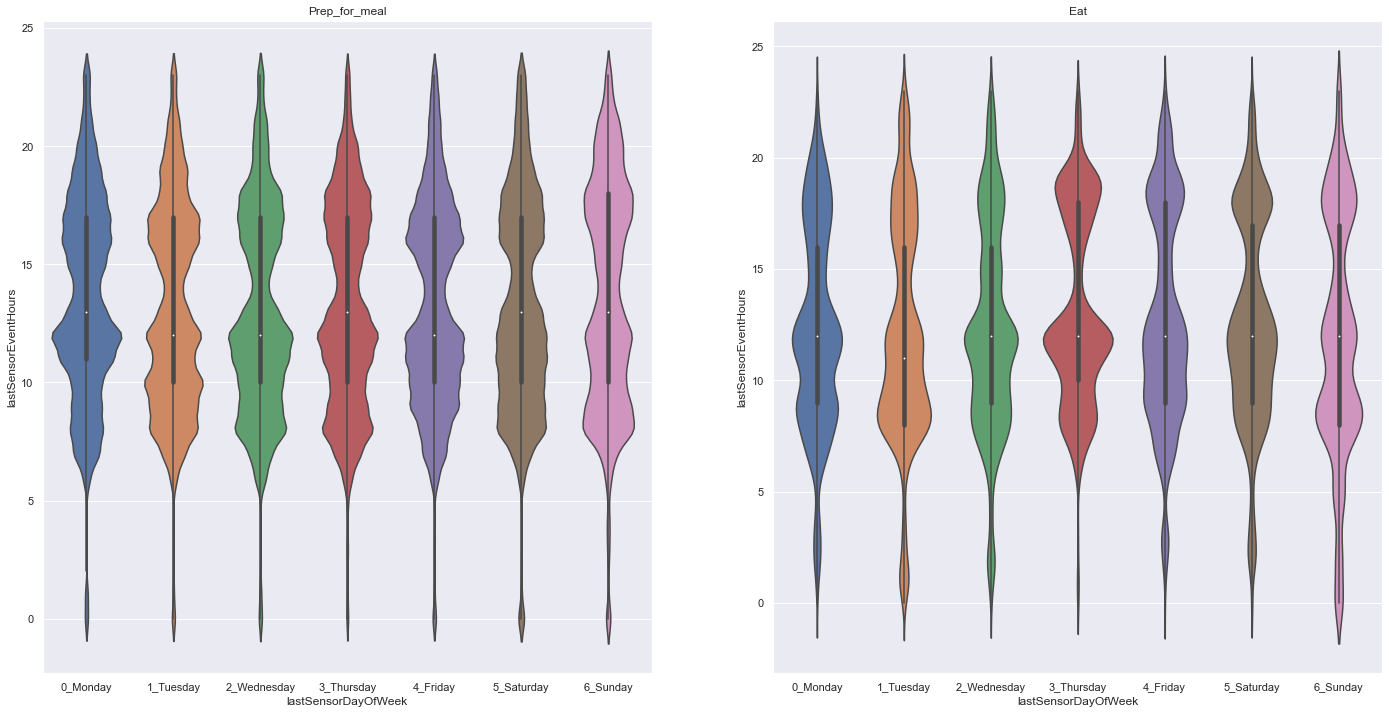

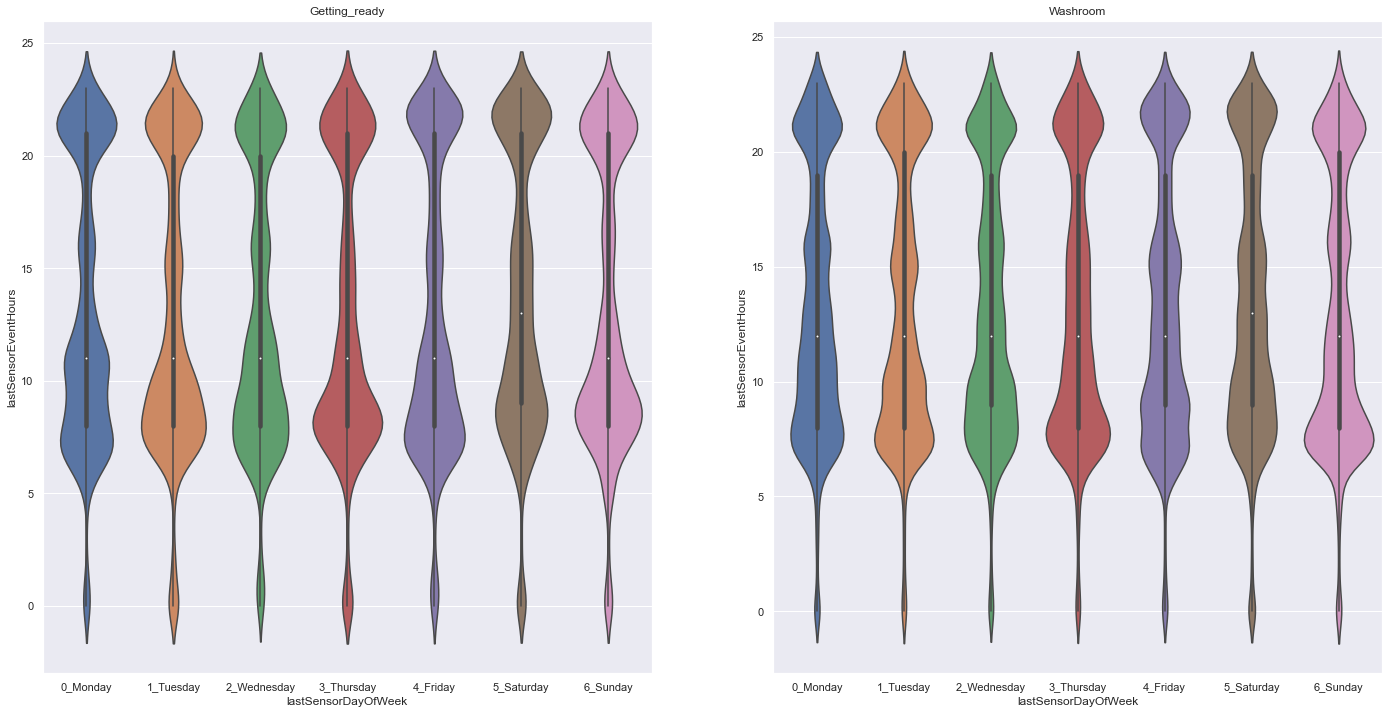

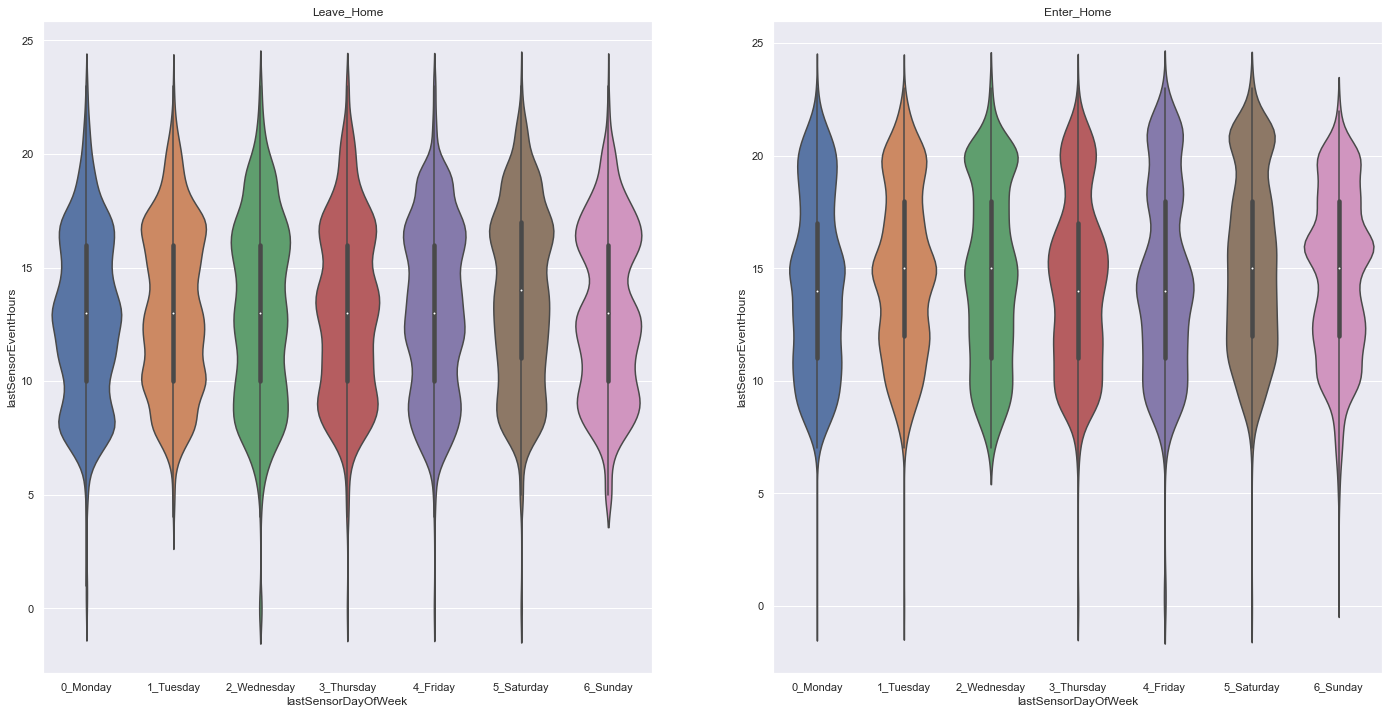

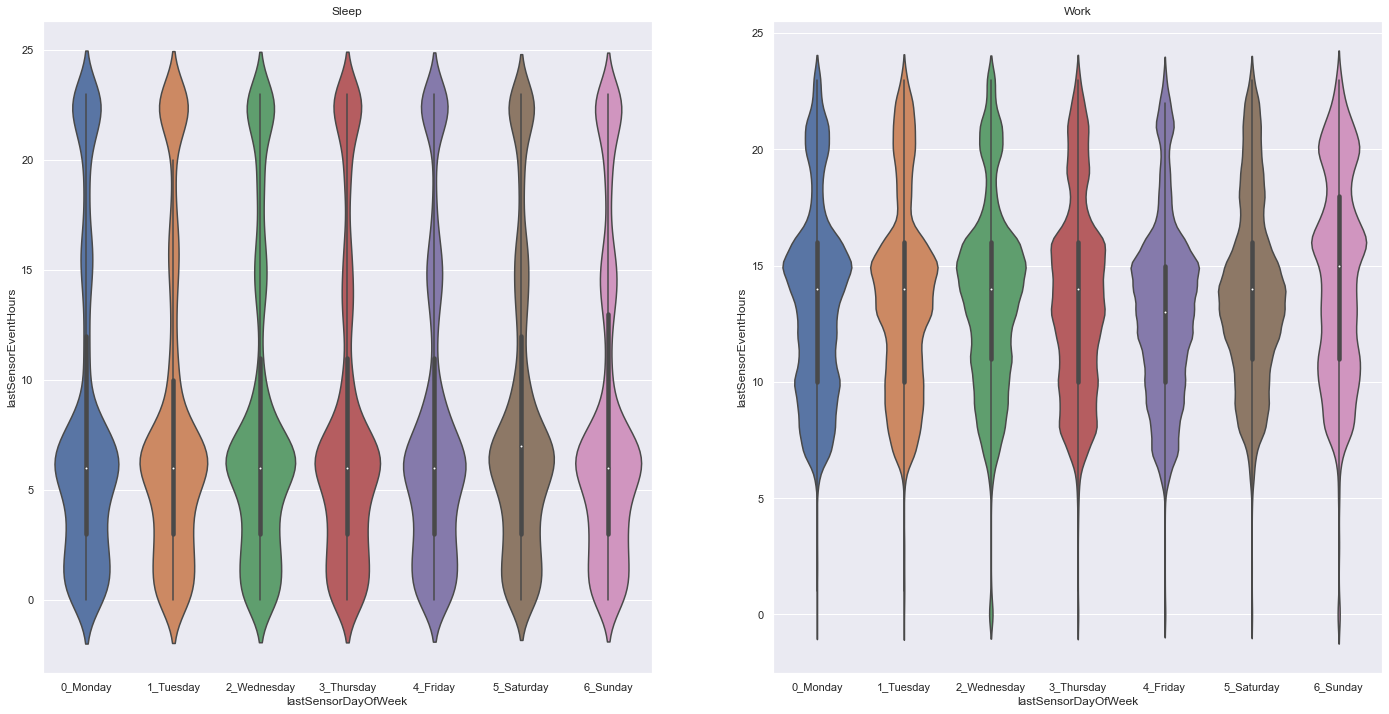

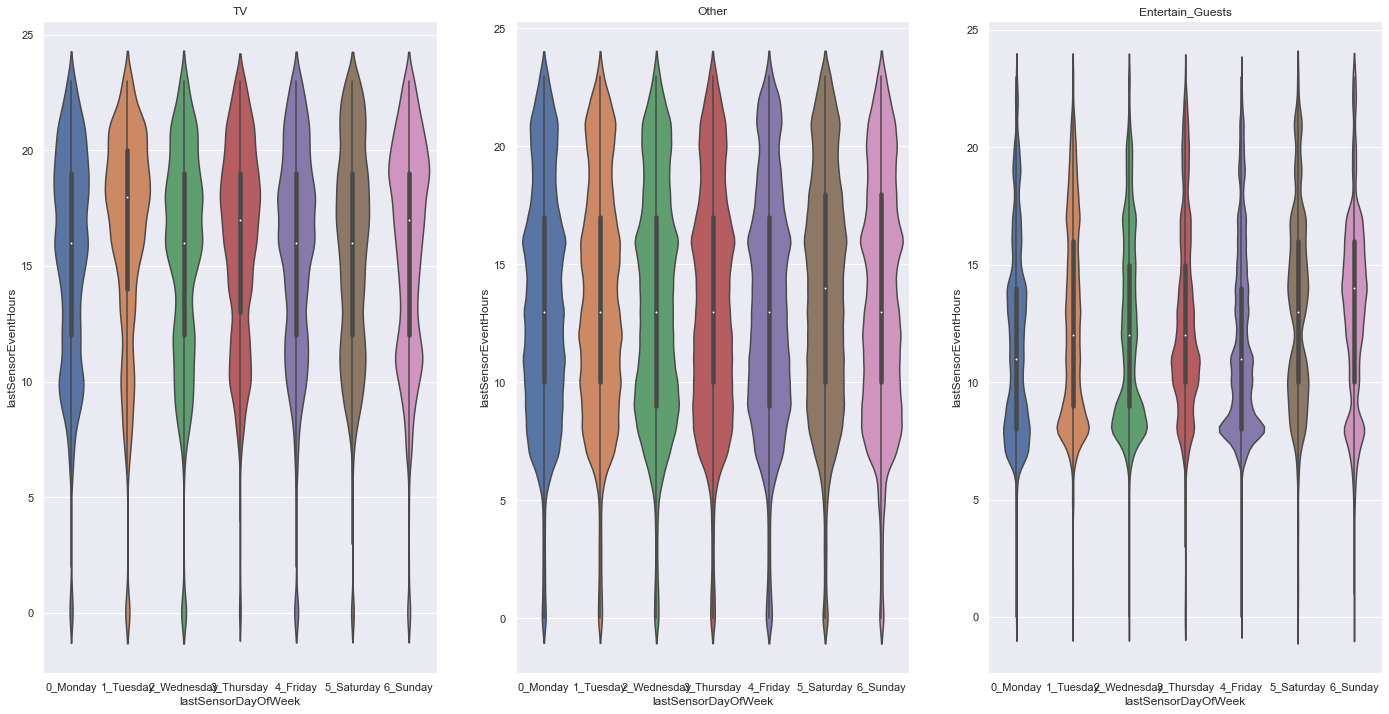

In [89]:
from matplotlib import pyplot
import seaborn

a4_dims = (24, 12)
fig, ax = pyplot.subplots(figsize=a4_dims,ncols=2)
sns.violinplot(ax=ax[0], data=Prep_for_meal, x="lastSensorDayOfWeek", y="lastSensorEventHours").set(title='Prep_for_meal')
sns.violinplot(ax=ax[1], data=Eat, x="lastSensorDayOfWeek", y="lastSensorEventHours").set(title='Eat')


a4_dims = (24, 12)
fig, ax = pyplot.subplots(figsize=a4_dims,ncols=2)
sns.violinplot(ax=ax[0], data=Getting_ready, x="lastSensorDayOfWeek", y="lastSensorEventHours").set(title='Getting_ready')
sns.violinplot(ax=ax[1], data=Washroom, x="lastSensorDayOfWeek", y="lastSensorEventHours").set(title='Washroom')


a4_dims = (24, 12)
fig, ax = pyplot.subplots(figsize=a4_dims,ncols=2)
sns.violinplot(ax=ax[0], data=Leave_Home, x="lastSensorDayOfWeek", y="lastSensorEventHours").set(title='Leave_Home')
sns.violinplot(ax=ax[1], data=Enter_Home, x="lastSensorDayOfWeek", y="lastSensorEventHours").set(title='Enter_Home')


a4_dims = (24, 12)
fig, ax = pyplot.subplots(figsize=a4_dims,ncols=2)
sns.violinplot(ax=ax[0], data=Sleep, x="lastSensorDayOfWeek", y="lastSensorEventHours").set(title='Sleep')
sns.violinplot(ax=ax[1], data=Work, x="lastSensorDayOfWeek", y="lastSensorEventHours").set(title='Work')


a4_dims = (24, 12)
fig, ax = pyplot.subplots(figsize=a4_dims,ncols=3)
sns.violinplot(ax=ax[0], data=TV, x="lastSensorDayOfWeek", y="lastSensorEventHours").set(title='TV')
sns.violinplot(ax=ax[1], data=Other, x="lastSensorDayOfWeek", y="lastSensorEventHours").set(title='Other')
sns.violinplot(ax=ax[2], data=Entertain_Guests, x="lastSensorDayOfWeek", y="lastSensorEventHours").set(title='Entertain_Guests')

### Correlation Heatmap

In [85]:
corr_df=pd.concat([df[num_list+['lastSensorEventHours']],pd.get_dummies(df[['message','senor_type','target']])],axis=1)
corr=corr_df.corr()

In [86]:
corr.to_csv(r'model_dataset\correlation_analysis_v2.csv')

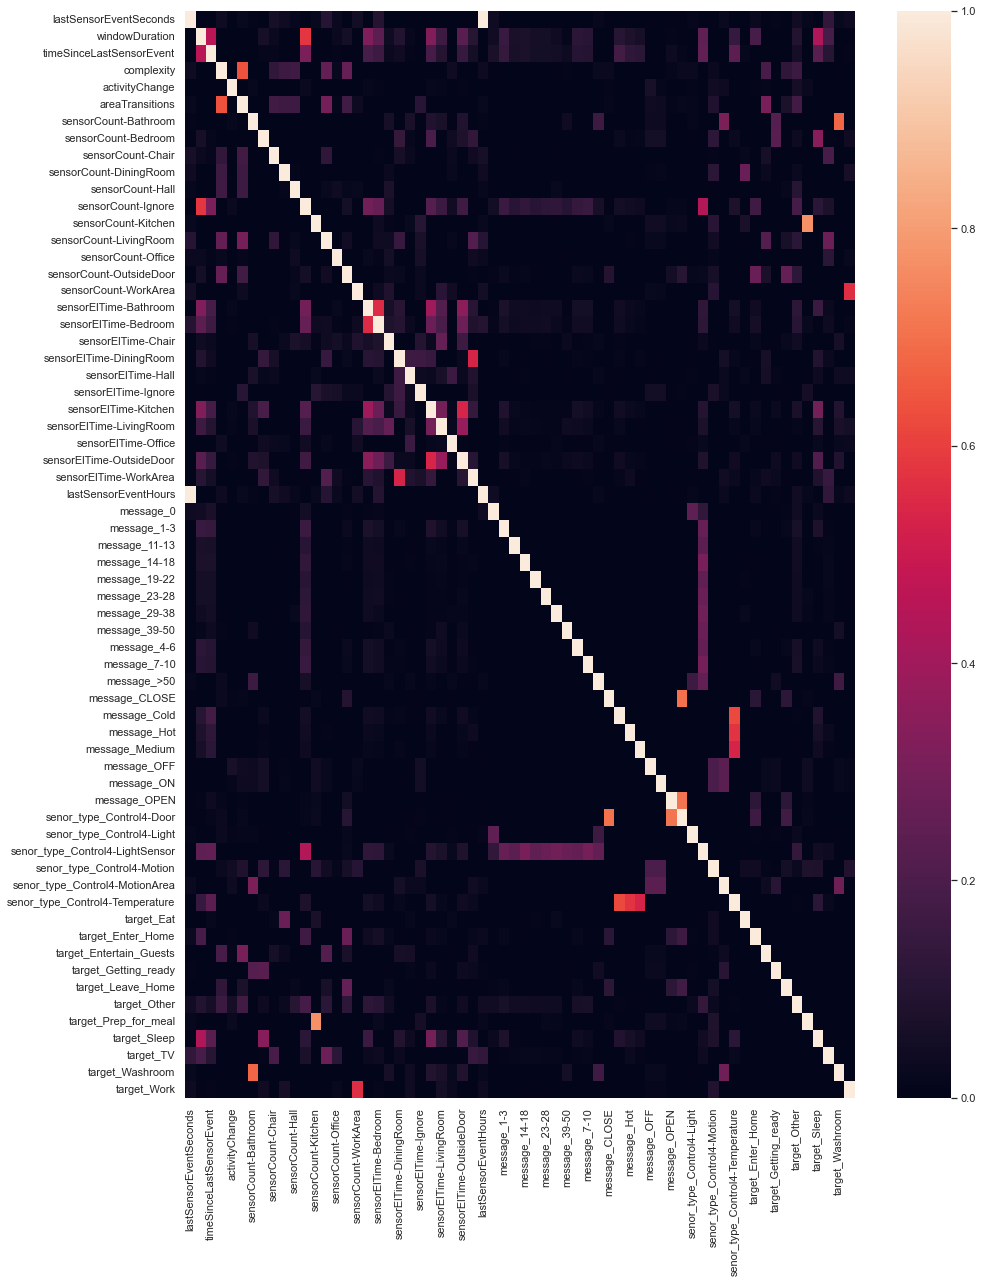

In [87]:
sns.set()
ax = sns.heatmap(corr, vmin=0, vmax=1)
plt.show()

<AxesSubplot:>

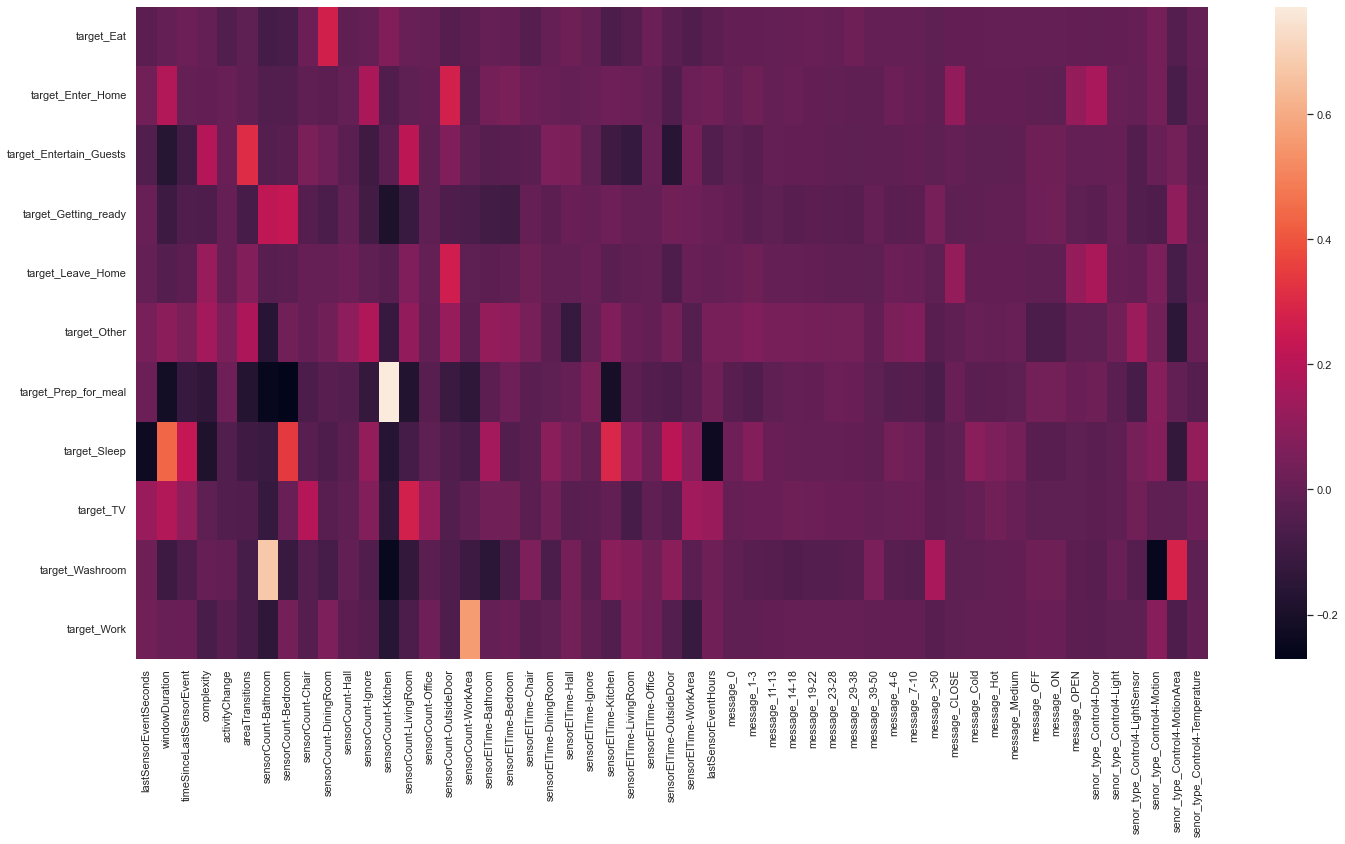

In [105]:
a4_dims = (24, 12)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.heatmap(ax=ax,data=corr.iloc[-11:,:-11])

### Sensor message vs Target Variable

In [110]:
df['message2']=df['senor_type']+':'+df['message']

In [35]:
y_train['target']=y_train['target'][~(y_train['target'].isna())]

[Text(0.5, 1.0, 'Message vs Target')]

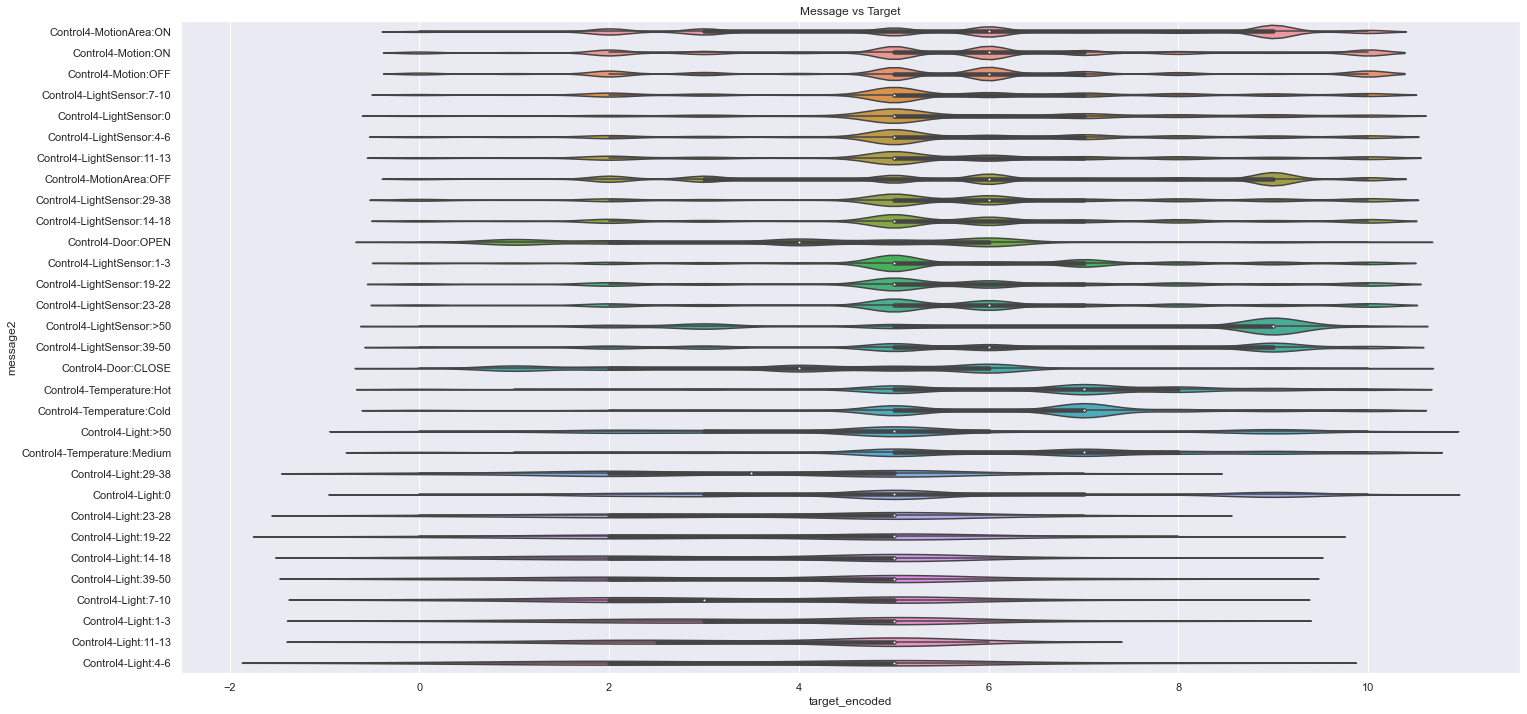

In [114]:
a4_dims = (24, 12)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.violinplot(ax=ax, data=df, x="target_encoded", y="message2").set(title='Sensor Message vs Target')

### Sensor Count Location and Senor Eltime location vs Target Variable

C:\Users\daksh\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


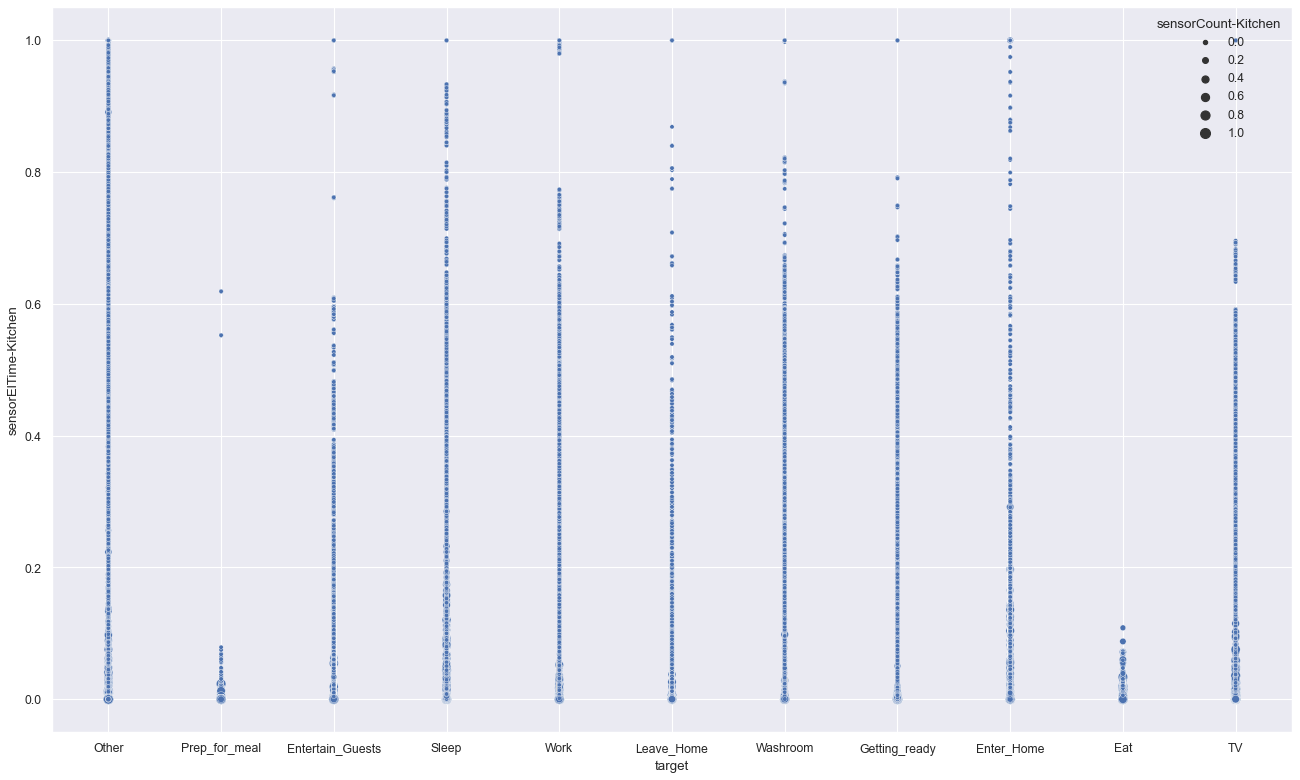

C:\Users\daksh\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


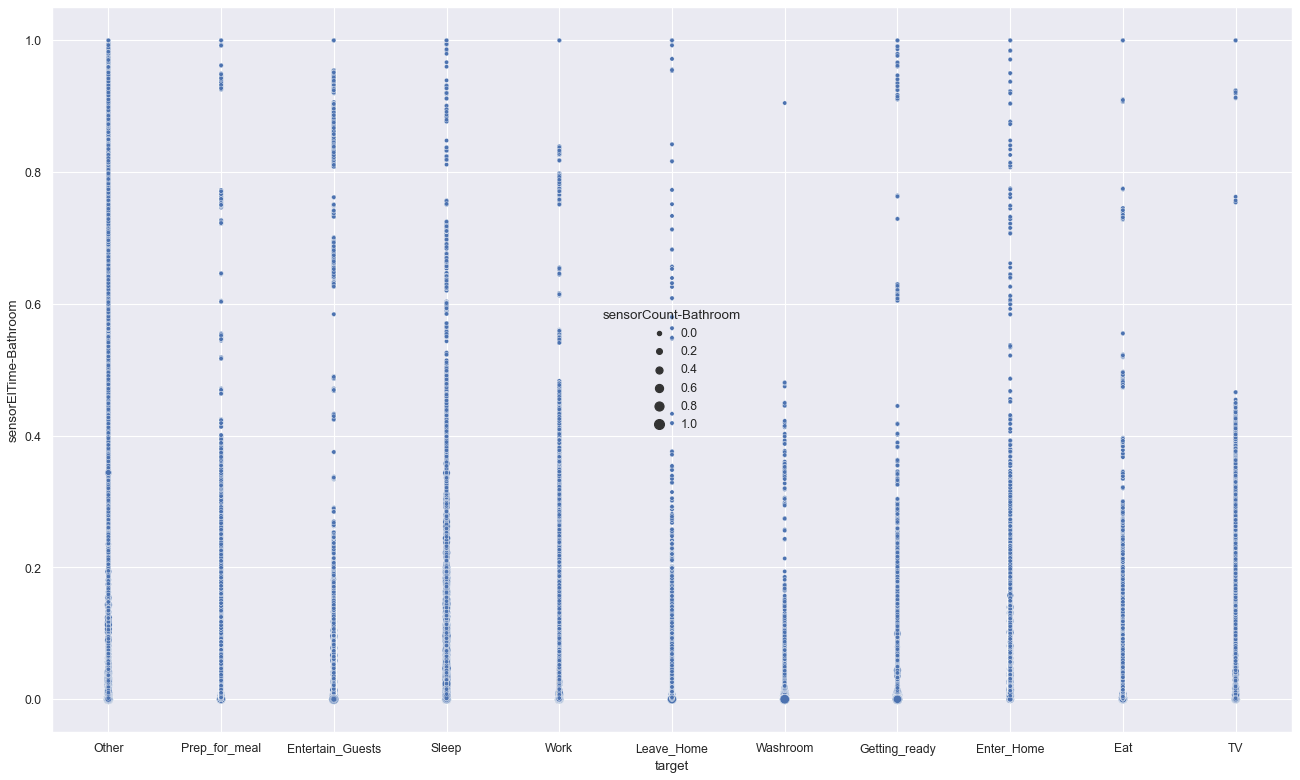

C:\Users\daksh\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


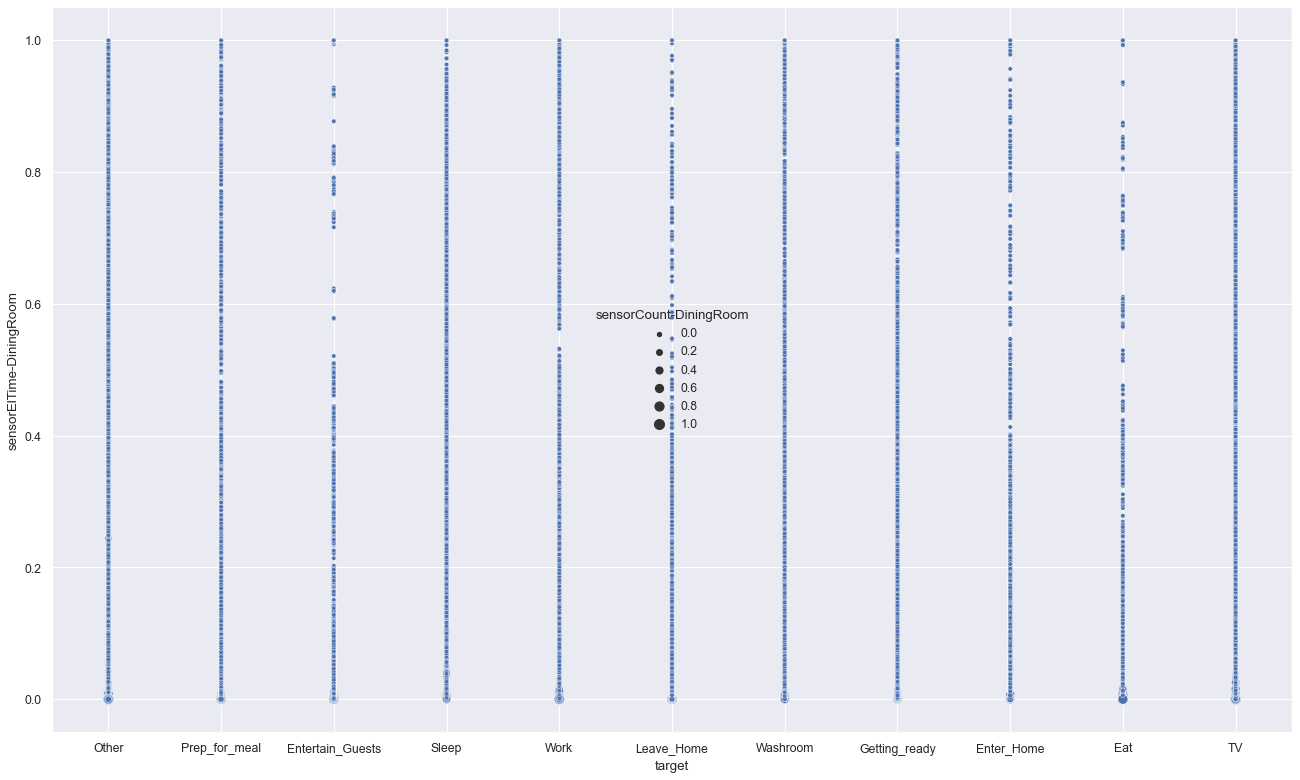

C:\Users\daksh\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


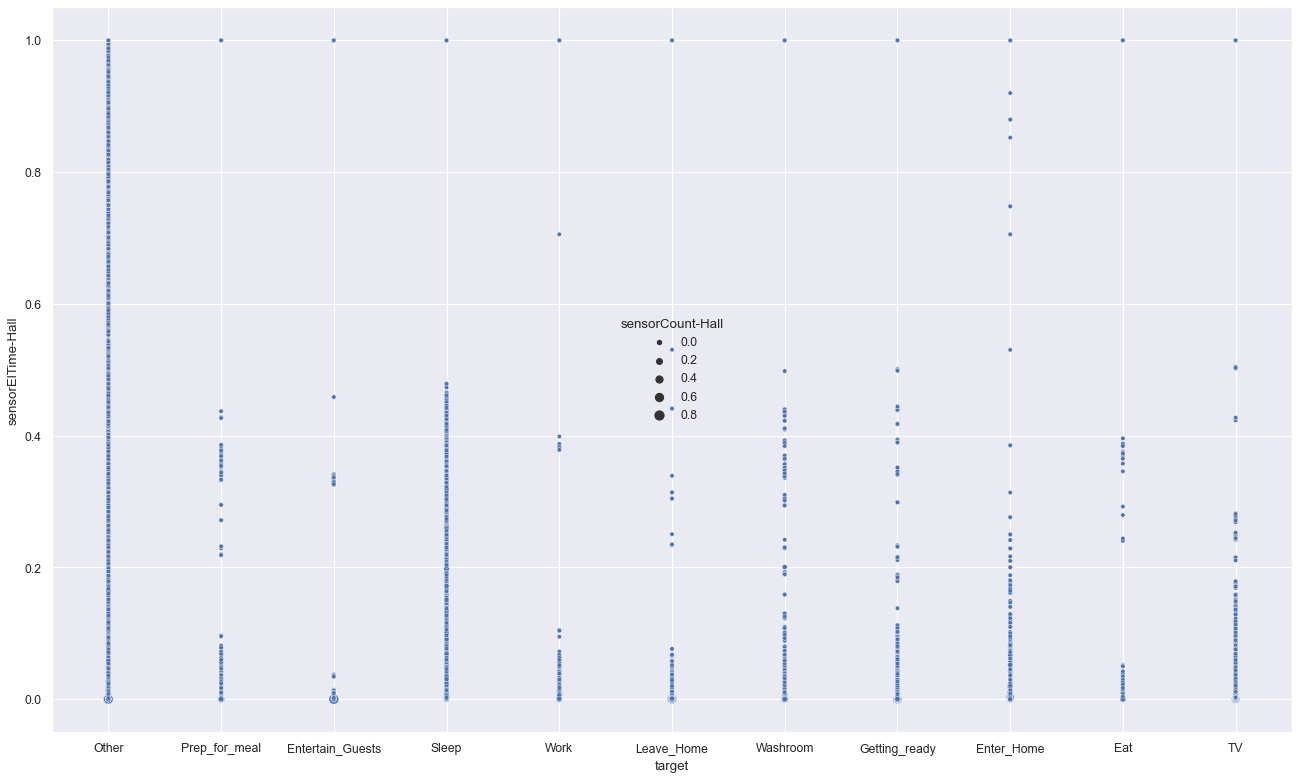

C:\Users\daksh\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


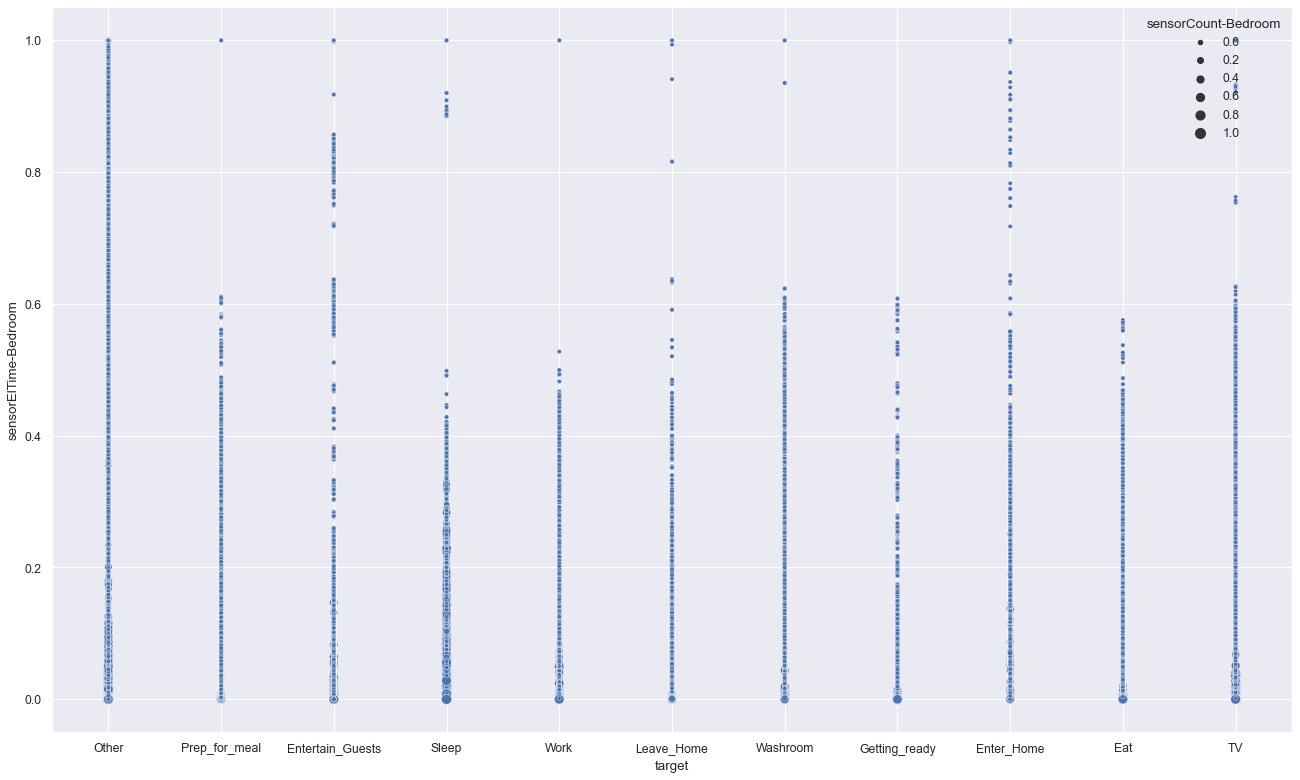

C:\Users\daksh\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


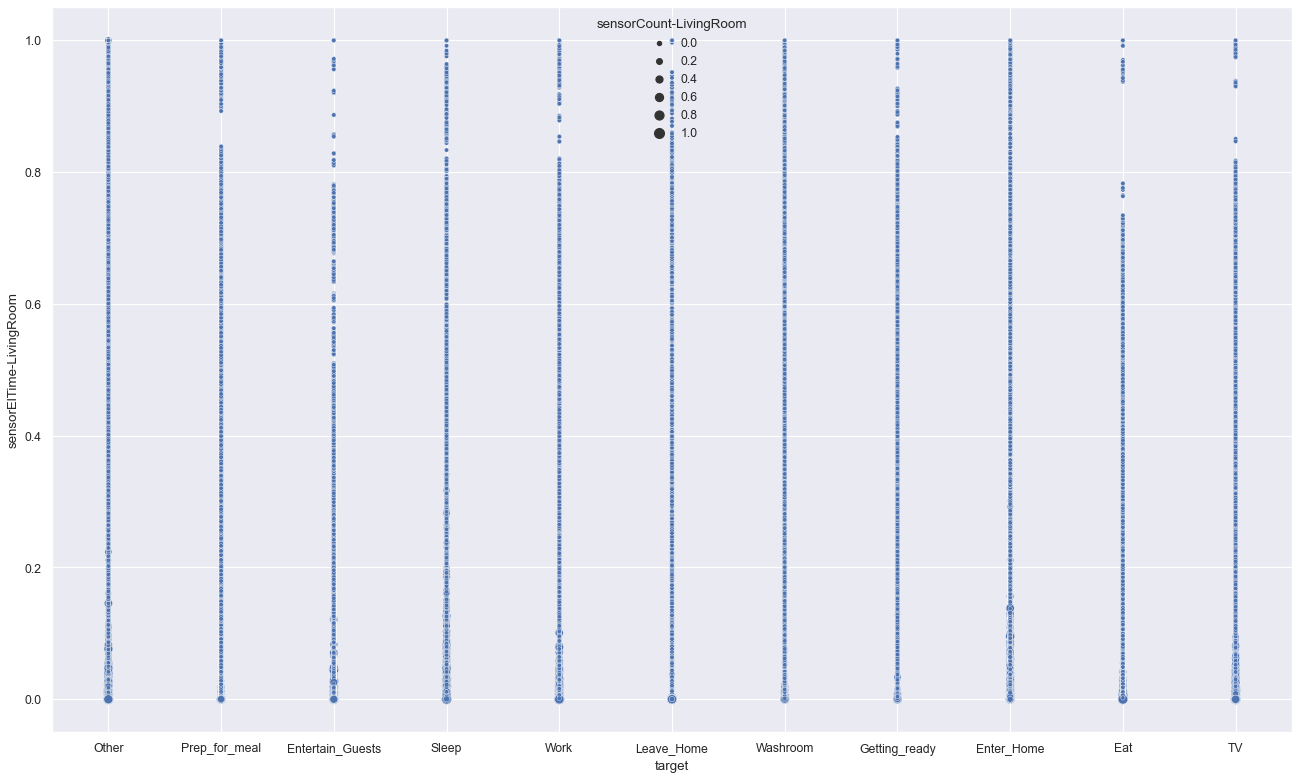

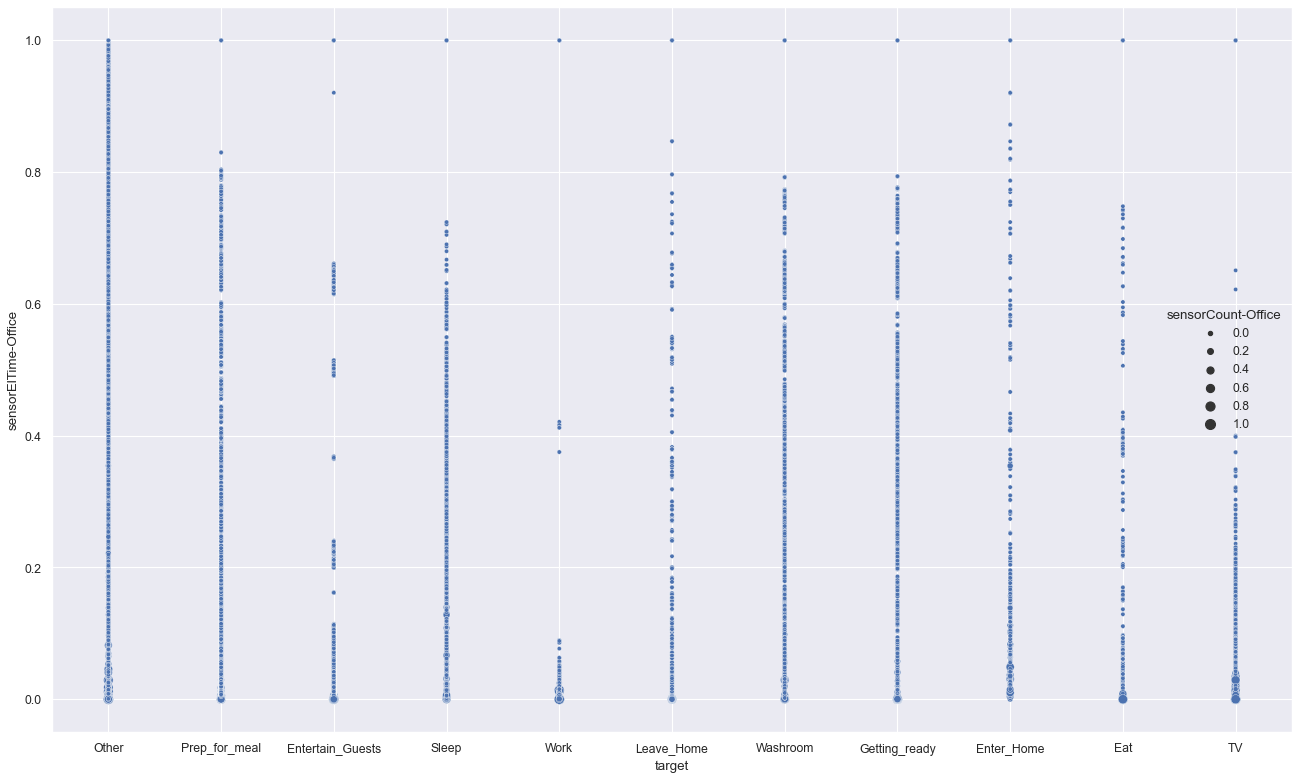

C:\Users\daksh\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


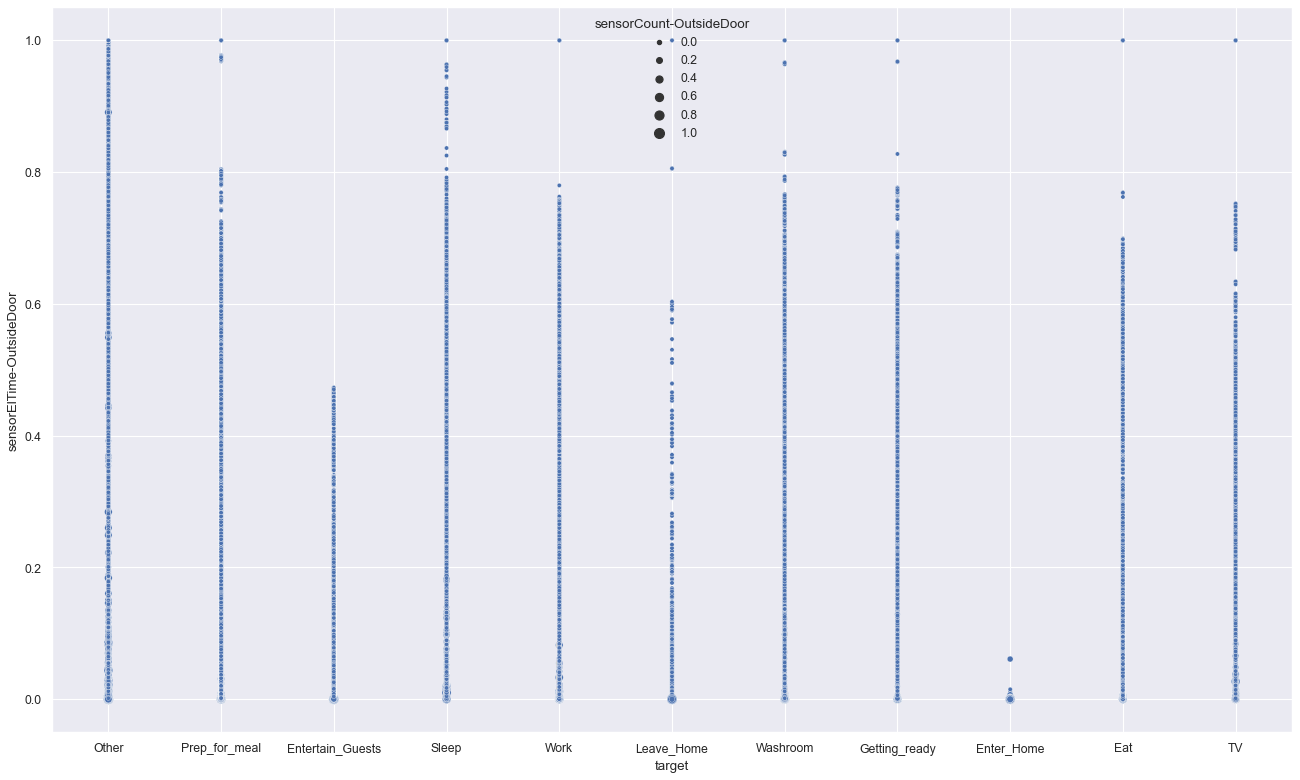

C:\Users\daksh\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


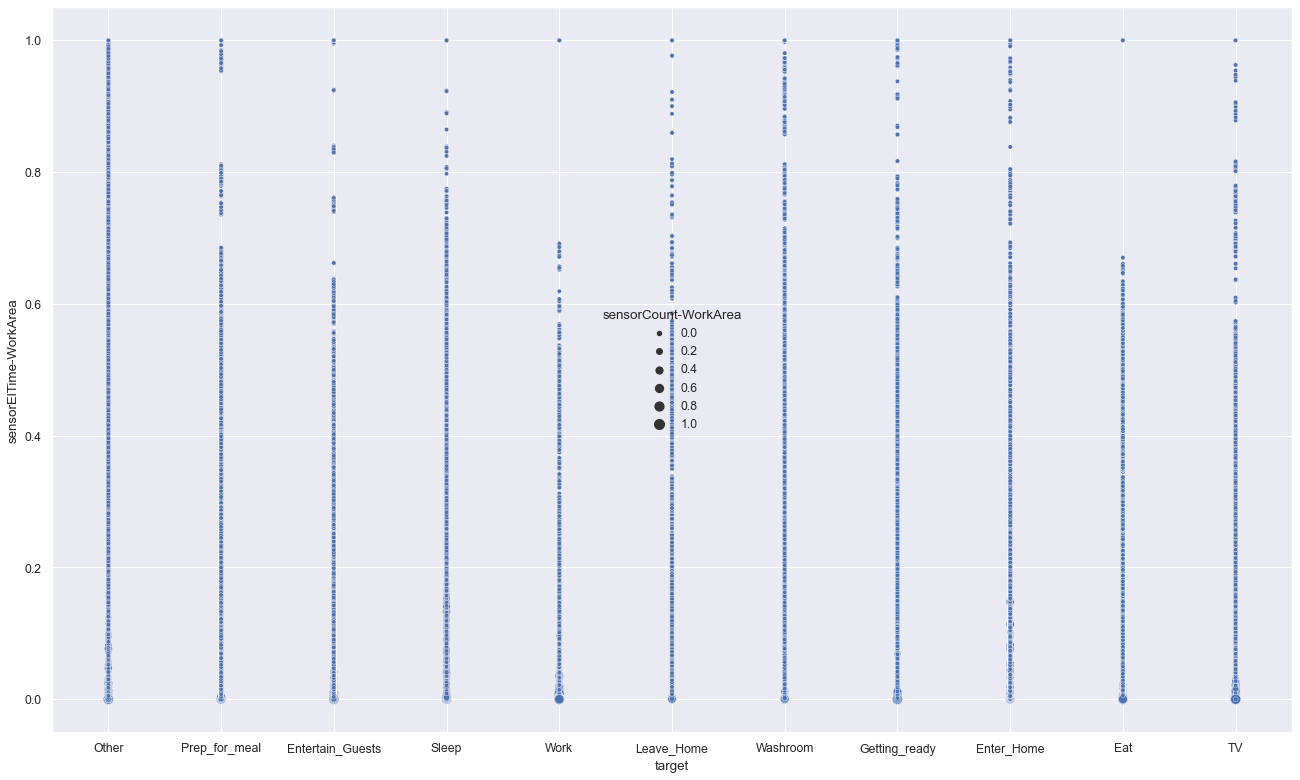

In [148]:
figure(figsize=(20,12), dpi=80)
sns.scatterplot(data=df, x="target", y="sensorElTime-Kitchen", size=df["sensorCount-Kitchen"], legend=True, sizes=(15, 80))

plt.show()
figure(figsize=(20,12), dpi=80)
sns.scatterplot(data=df, x="target", y="sensorElTime-Bathroom", size=df["sensorCount-Bathroom"], legend=True, sizes=(15, 80))

plt.show()

figure(figsize=(20,12), dpi=80)
sns.scatterplot(data=df, x="target", y="sensorElTime-DiningRoom", size=df["sensorCount-DiningRoom"], legend=True, sizes=(15, 80))

plt.show()

figure(figsize=(20,12), dpi=80)
sns.scatterplot(data=df, x="target", y="sensorElTime-Hall", size=df["sensorCount-Hall"], legend=True, sizes=(15, 80))

plt.show()

figure(figsize=(20,12), dpi=80)
sns.scatterplot(data=df, x="target", y="sensorElTime-Bedroom", size=df["sensorCount-Bedroom"], legend=True, sizes=(15, 80))

plt.show()

figure(figsize=(20,12), dpi=80)
sns.scatterplot(data=df, x="target", y="sensorElTime-LivingRoom", size=df["sensorCount-LivingRoom"], legend=True, sizes=(15, 80))

plt.show()

figure(figsize=(20,12), dpi=80)
sns.scatterplot(data=df, x="target", y="sensorElTime-Office", size=df["sensorCount-Office"], legend=True, sizes=(15, 80))

plt.show()

figure(figsize=(20,12), dpi=80)
sns.scatterplot(data=df, x="target", y="sensorElTime-OutsideDoor", size=df["sensorCount-OutsideDoor"], legend=True, sizes=(15, 80))

plt.show()

figure(figsize=(20,12), dpi=80)
sns.scatterplot(data=df, x="target", y="sensorElTime-WorkArea", size=df["sensorCount-WorkArea"], legend=True, sizes=(15, 80))

plt.show()